## AllLife Credit Card Customer Segmentation

Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the  Marketing  team  proposes  to  run  personalised  campaigns  to  target  new customers  as  well  as  upsell  to  existing  customers.  Another  insight  from  the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

Objective: 
    To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

Key Questions:
    1.How many different segments of customers are there?
    2.How are these segments different from each other?
    3.What are your recommendations to the bank on how to better market to and service these customers?
    
Data Description:
    Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 

### Steps to follow:

##### 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
##### 2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

In [1]:
# start by importing libraries for the EDA:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore


In [2]:
df = pd.read_excel("Credit Card Customer Data.xlsx") # Open de data file
df.dtypes # - understand the data types

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [3]:
# All variables are numeric.

print("Shape: ",df.shape)
df  # Taking a look at the data first 5 and last 5 rows. and the shape of dataframe:

Shape:  (660, 7)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [4]:
# it seems 'Cust Key' and 'Avg_Credit_Limit' have a larger scale than the rest of the data
df.isnull().sum()   #Looking for null values

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
# There are no null values
df.describe().transpose()   #obtaning mean, min, max, quantiles and standard deviation

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


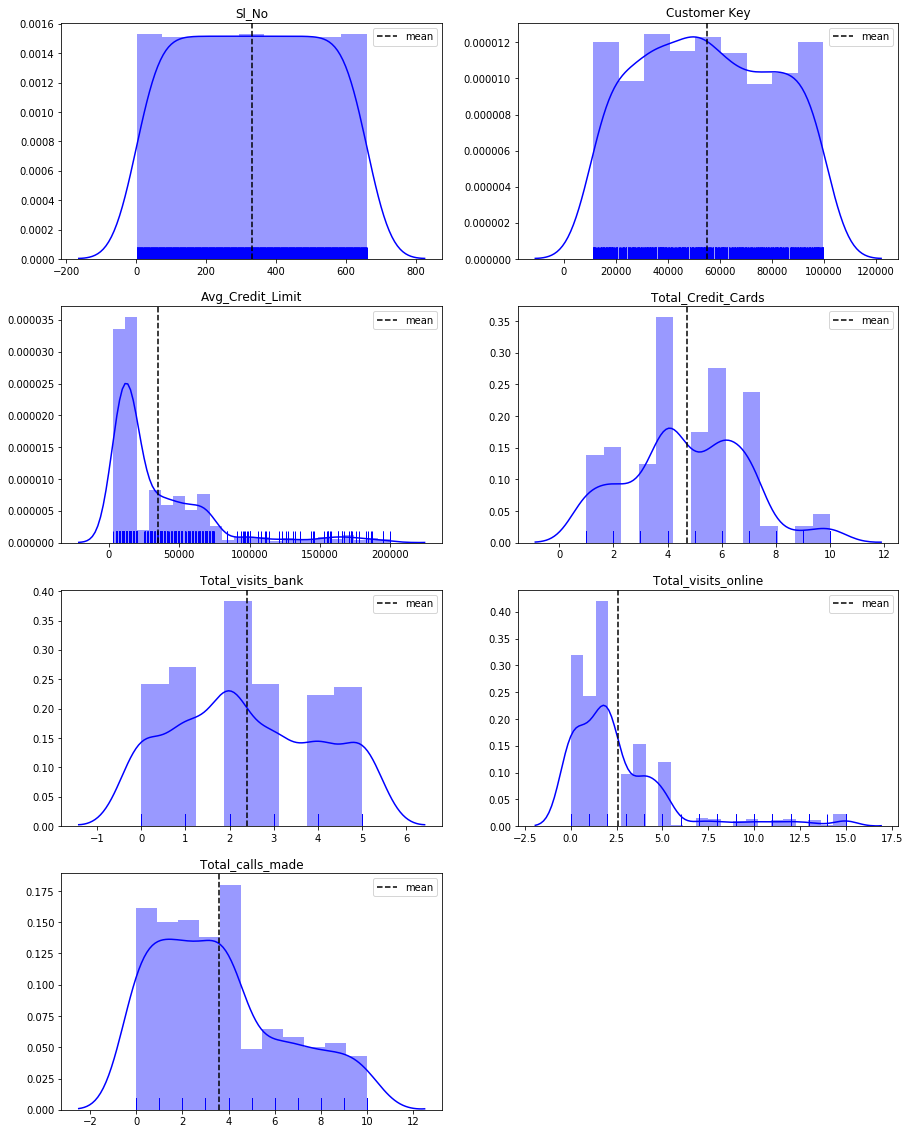

In [6]:
# Two input variables 'Cust Key' and 'Avg_Credit_Limit' seem to be in a very different scale that would dominate the analysis if not scaled 

# Getting univariate plots to understand the distribution and bias of each variable
import itertools
cols = [i for i in df.columns]
fig = plt.figure(figsize=(15, 20))
for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color='b',rug=True)
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

This file seems to be a random sample of customers of the bank.
The 'Sl_No' variable is a consecutive number of the entries in the sample (660 values)

and 'Customer_Key' variable apperar to be identificators used and assigned by the bank, hence they have no information and could be candidates for dimension reduction, but will wait for the correlation analysis.

Total_Visits_Online and Avg_Credit_Limit both have a bias to the right and probably outliers, while Total_Credit_Cards has at least 4 main groups, and Total_Calls_Made has two groups, Total_Visits to bank has 3 groups.


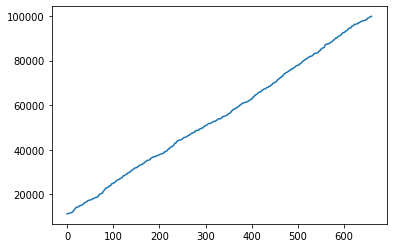

In [7]:
# I want to take a closer look 'Customer Key' by sorting and ploting it to see if it contains information:
df2=df.copy(deep=True) 
df3=df2.sort_values('Customer Key').reset_index()
ly=df3[('Customer Key')]
plt.plot(ly)

'Customer Key' does not seem to contain information as it grows linearly, hinting the sample was taken randomly from a bigger database.
It could provide information if this variable was related to the 'age' of the customer with the bank, but there is no assurance of that (it would be a question for the stakeholders) if  both Sl_No (Sample number consecutive) and 'Customer Key' also come from a bigger database for which it is also a consecutive number, both will have a high correlation, and this make them candidates to be dropped, but I will make the decision later, after the bi-variate analysis

In [8]:
# Look for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [9]:
# There seem to be no duplicated rows in the data

### Bivariate analysis


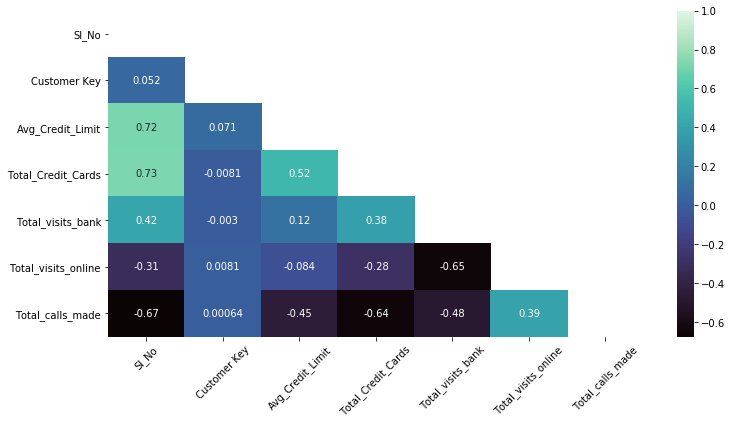

In [10]:
# Plotting correlations between the variables
plt.subplots(figsize=(12, 6))
corr = df.corr('spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

'Total Calls made' variable has high inverse correlation with other variables such as 'Total Credit Cards'.
As expected, Sl_No, is highly correlated to 'Customer Key', one being a simple consecutive number in the dataframe, and the other increasing linearly as Sl_No increases, bothe confirm to be candidates to be dropped. 

Sl_no (sample number?) has also high correlation with 'Avg_Credit_Limit' but only in the sense of both growing, but could be due to different causation and in a different way, will confirm relationship between the variables in the pairplot.

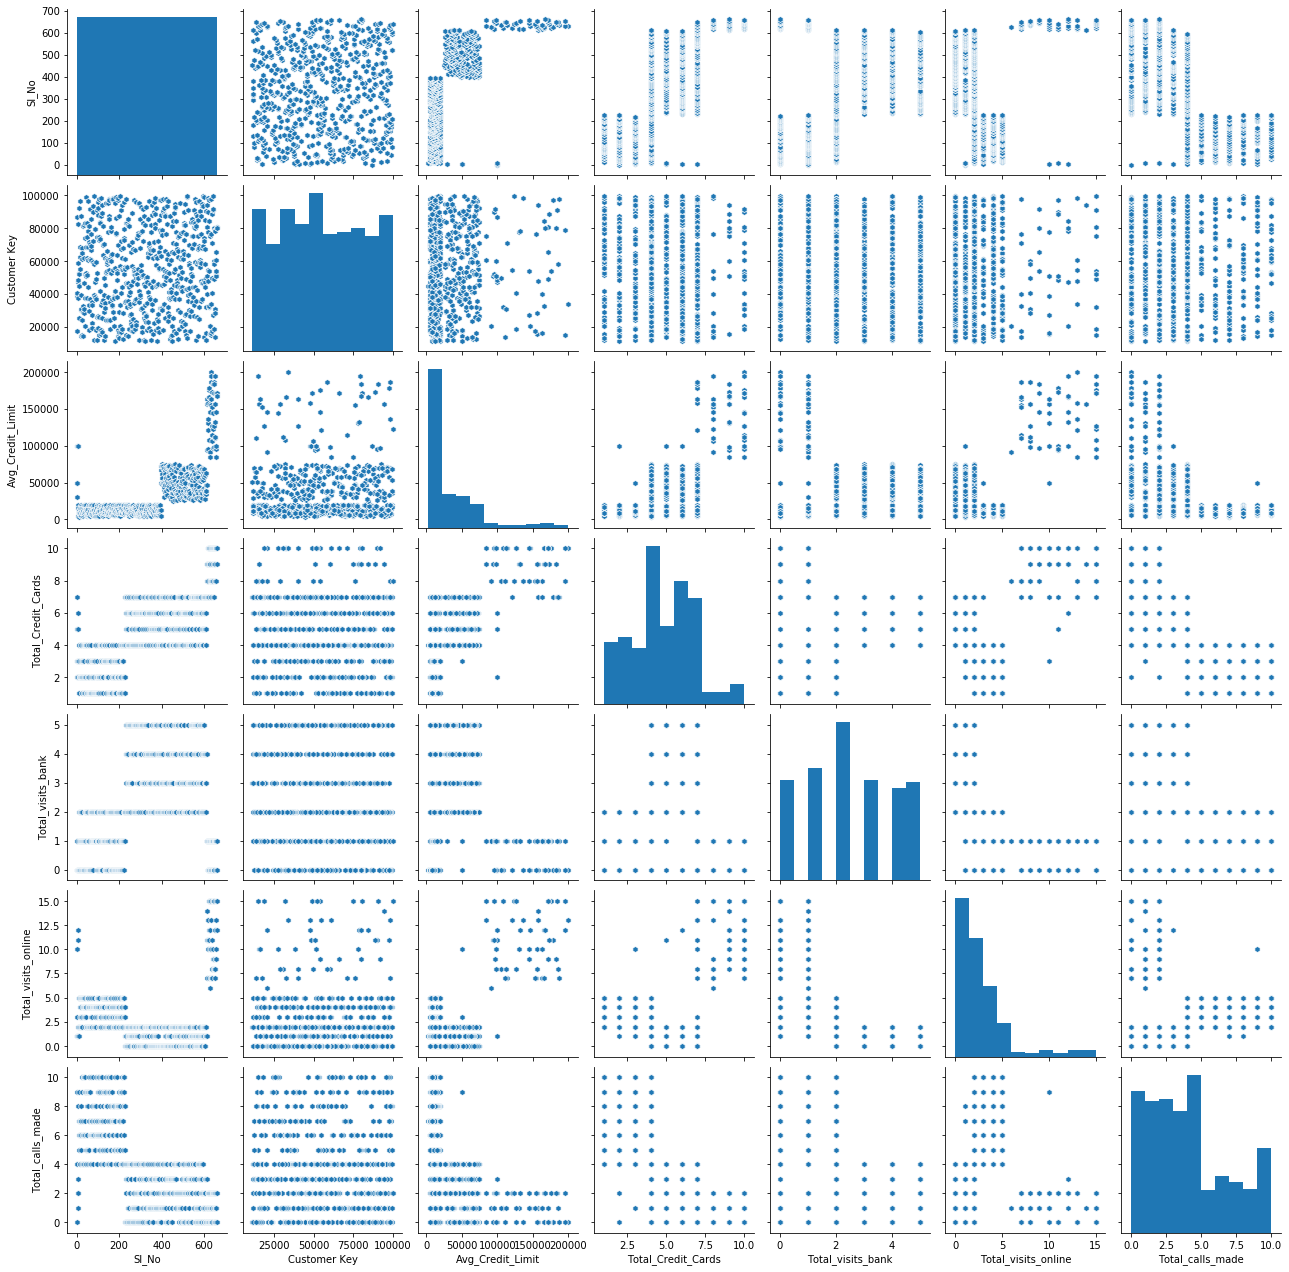

In [11]:
sns.pairplot(df,markers="h")
plt.show()

From the pairplot we can see that 'Average_Credit_Limit' and 'Total visits_online' , together with Sl_No, form at least 4 very distinct groups. Sl_No and Customer_Key seem to have strong 'grouping' combined with other variables and seem to be artificial variables, probably the groups in there were selected or created on purpose, I will keep them for the moment.

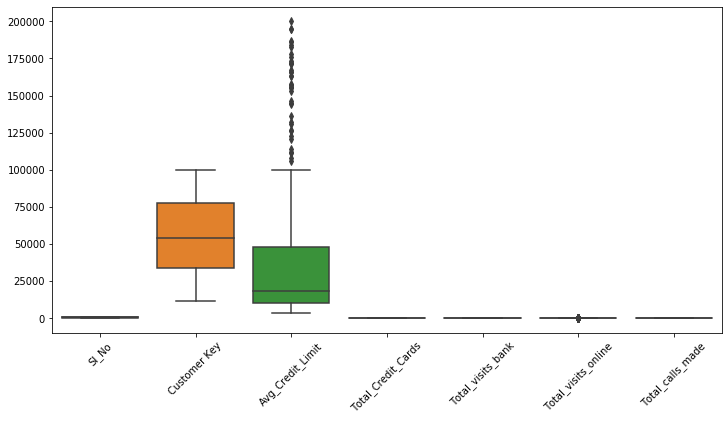

In [12]:
# doing box plot to see scale, comparison and identify outliers:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### there are two variables : 'Customer Key' and 'Av_Credit_Limit' that predominate  
- we need to do scalation for Clustering techniques to work properly
- Also 'Avg_Credit_Card' has several outliers



In [13]:
from scipy.stats import zscore
dfS = df.apply(zscore)

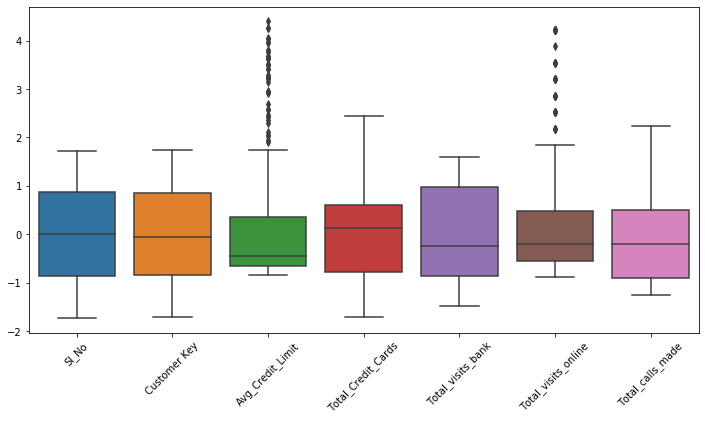

In [14]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=dfS)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Now we can see Total_Visits_Online also has outliers

In [15]:
# Deal with 'Avg_Credit_Limit' Outliers
df2=dfS.copy(deep=True)
from IPython.display import display
display(df2['Avg_Credit_Limit'].describe())
for i in range(len(df2.Avg_Credit_Limit)):   #Go trhough the column changing the outliers for the mean 
            q1, q2, q3 = df2.Avg_Credit_Limit.quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = df2.Avg_Credit_Limit[i] > q3 + 1.5*IQR
            b = df2.Avg_Credit_Limit[i] < q1 - 1.5*IQR
            c = df2.Avg_Credit_Limit.mean()   # I selected the mean because it yielded better clustering
            df2.Avg_Credit_Limit[i] = np.where(a | b, c, df2.Avg_Credit_Limit[i])

display(df2['Avg_Credit_Limit'].describe()) # to display the changes after dealing with the outliers


count    6.600000e+02
mean     8.195465e-16
std      1.000758e+00
min     -8.398081e-01
25%     -6.536229e-01
50%     -4.408398e-01
75%      3.570968e-01
max      4.399975e+00
Name: Avg_Credit_Limit, dtype: float64

count    660.000000
mean      -0.206957
std        0.558363
min       -0.839808
25%       -0.653623
50%       -0.440840
75%        0.091118
max        1.740187
Name: Avg_Credit_Limit, dtype: float64

In [16]:
# Deal with 'Total_visits_online' Outliers
display(df2['Total_visits_online'].describe())
for i in range(len(df2.Total_visits_online)):   #Go trhough the column changing the outliers for the mean 
            q1, q2, q3 = df2.Total_visits_online.quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = df2.Total_visits_online[i] > q3 + 1.5*IQR
            b = df2.Total_visits_online[i] < q1 - 1.5*IQR
            c = df2.Total_visits_online.mean()   # I selected the mean because it yielded better clustering
            df2.Total_visits_online[i] = np.where(a | b, c, df2.Total_visits_online[i])

display(df2['Total_visits_online'].describe())  # to display the changes after dealing with the outliers

count    6.600000e+02
mean     1.944572e-16
std      1.000758e+00
min     -8.883795e-01
25%     -5.474897e-01
50%     -2.065999e-01
75%      4.751797e-01
max      4.224968e+00
Name: Total_visits_online, dtype: float64

count    660.000000
mean      -0.222133
std        0.520477
min       -0.888380
25%       -0.547490
50%       -0.206600
75%        0.134290
max        1.497849
Name: Total_visits_online, dtype: float64

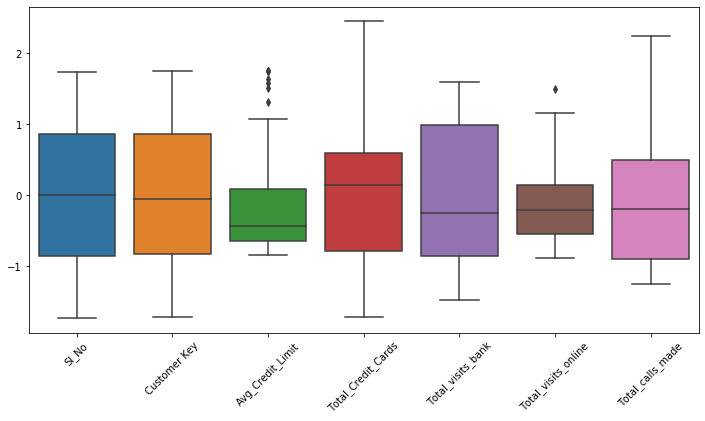

In [17]:
# Ploting one last time to see the results of outlier treatments
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [18]:
# The variables are now standarized and within the similar ranges, although few more aouliers remain.

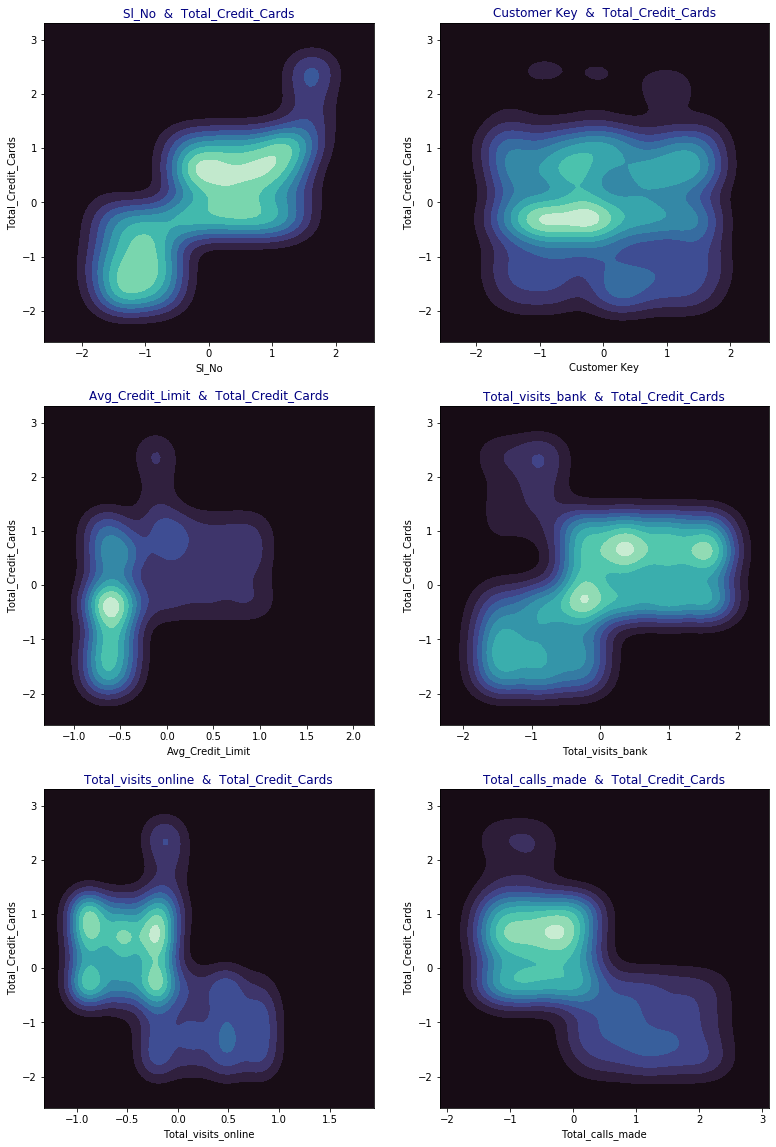

In [19]:
# Now I want to explore how dense is the relation of all variables with Total_Credit_Cards, as it seems to have few values
# I chose Total_Credit_Cards as is the input variable wich seems to group more clearly the pairplots with the rest of variables
cols = [i for i in df2.columns if i not in 'Total_Credit_Cards']   # Creating an array with the columns
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):   # Looping for all columns and all data  
    plt.subplot(4,2,j+1)
    sns.kdeplot(df2[i],   # plot kernel density estimate for visualizing the distribution of observations in two dimensions.
                df2["Total_Credit_Cards"],
                cmap="mako",
                shade=True)
    plt.title(i+"  &  Total_Credit_Cards",color="navy")

We see that there are between 1-5 clusters, with similar densities and smaller groups in repeated, specific areas of the dimensions pairs, could be a hint of the number of main clusters being around 4 or 5. 

Drop Sl_No and Customer_Key
Dealing with outliers for Avg_Credit_Limit and Total_Visits_Online 


In [20]:
# Backing-up the work dataframe and droping the correlated features:
df6=df2.copy(deep=True)  # backup df
df2=df2.drop(['Sl_No','Customer Key'],axis=1)# droping 'Customer Key' and 'Sl_No'

## Clustering 
#### 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

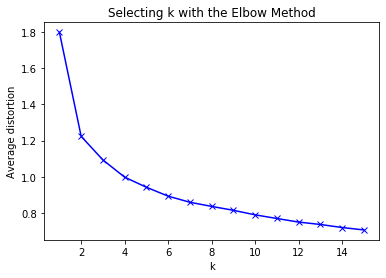

In [21]:
# Importing additional libraries
from scipy.spatial.distance import cdist
clusters=range(1,16)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)  # Looping to observe the distortion as we increase the number of clusters
    model.fit(df2)                    # Uning K means first, we will use Herarquical later
    prediction=model.predict(df2)
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1)) / df2
                           .shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [22]:
# I see the bend beween 4 and 5, so let us do the excercise with 4 and 5 clusters
# Additionally I'm making two copies for future use downstream:
df3=df2.copy(deep=True)  # To be used in the box plotting
df4=df3.copy(deep=True)  # Reserved for use in the Herarquical

#### processing Kmeans for clusters=5
kmeans = KMeans(n_clusters=5, n_init = 5, random_state=33)
kmeans.fit(df3)

KMeans(n_clusters=5, n_init=5, random_state=33)

In [23]:
# Check the number of items in each cluster
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[190 111 196  50 113]


In [24]:
# Add cluster number to original data
predictions = kmeans.predict(df3)
df3["Group"] = predictions
df3['Group'] = df3['Group'].astype('category') # Changing the group values to categories, for grouping
df3.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
Group                  category
dtype: object

In [25]:
df3.head(5)   # We can see now the Group has been added to the dataframe

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,1.740187,-1.249225,-0.860451,-5.474897e-01,-1.251537,2
1,0.410293,-0.787585,-1.473731,1.944572e-16,1.891859,4
2,0.410293,1.058973,-0.860451,1.342899e-01,0.145528,3
3,-0.121665,0.135694,-0.860451,-5.474897e-01,0.145528,2
4,1.740187,0.597334,-1.473731,-3.818968e-03,-0.203739,3


[190 111 196  50 113]


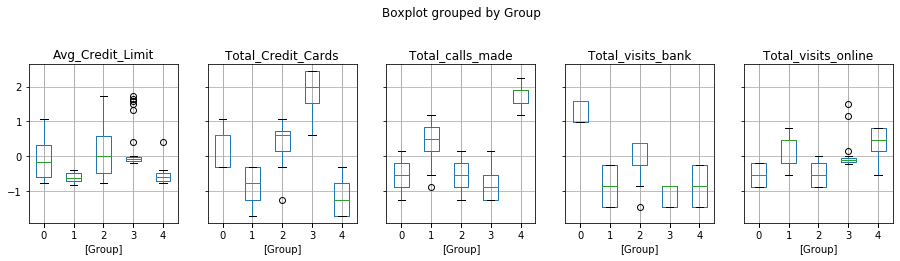

In [26]:
# Boxploting to visualize the groups:
df3.boxplot(by = 'Group',  layout=(3,5), figsize=(15, 10))
print(counts) # print the number of items in each cluster next to the boxplots , just for convenience 

##### Findings: 
    Group 3 is the smallest with 50 samples, but also more spread in AVG Credit Limit, and has the highest number of credit cards
    Group 0 is the one that visits the bank-
    Group 4 the one that calls more times to the bank.
    Groups 1 and 2 seem to behave the same, but at diferent scales, so, maybe we could grop them together
Because of groups 1 and 2 are similar, we need to look at clusters=4

Size of the Groups: [221 199  50 190]


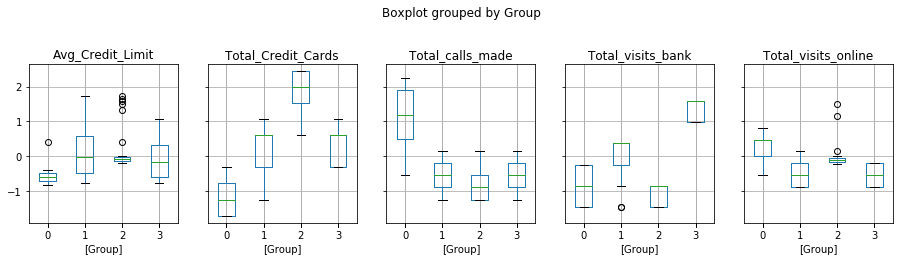

In [27]:
#  Repeating the process for clusters=4
df3=df2.copy(deep=True)  # Reseting the work-dataframe
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=33)
kmeans.fit(df3)
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
predictions = kmeans.predict(df3)
df3["Group"] = predictions
df3['Group'] = df3['Group'].astype('category')
df3.boxplot(by = 'Group',  layout=(3,5), figsize=(15, 10))
print('Size of the Groups:',counts)

##### From above, I would prefer to offer the bank Marketing department 4 disctict groups:
The groups seem more distigushable:

    - Group 0 - Seem to have fewer credit cards, using the internet more consistently, although they prefer to call the bank and/or have more frequent internet-customer service issues. also have the lowest avg credit limit (younger people or low spenders or could include disgrunted customers). The bank could offer better online service and leverage the propensy of this group to use the internet, also could ofer them more credit cards.
    
    - Group 1 - Seem to have 'average behaviour', is not the biggest, but have consistent visits to the bank.
    
    - Group 2 - Is the smallest group. and seem to have the highest numbers of credit cards, they like to use internet, and have outliers in Avg Credit limit. Probable high spenders that the bank wants to retain. The bank has to give them premium service and offer them term deposits.
    
    - Group 3  - Visit the bank the most - together with group 1, they don't want to use the internet, averaging in the rest of variables, the bank could offer improved quality of service at the branches.

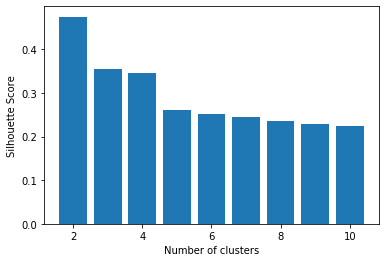

In [28]:
# Now we will check the silhouette metrics for various numbers of clusters:
from sklearn import metrics
from sklearn.metrics import silhouette_score

silhouette_scores = [] 
for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df2, KMeans(n_clusters = n_cluster).fit_predict(df2))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

Conclusions for KMeans:
Silhouette score means how two neighbour clusters are different from each other, of course we could use only 2 clusters (the higher Silhouette score) but then we could not give sufficient groups to the marketing and customer service departments to work with and focus in customer type. 
So, the graph above confirms that 4 could be a good 'compromise': fewer clusters will result in broader campaigns , not focusing in individual need of the customers, larger number of clusters could yield some groups very similar to each other and multiple efforts for the same type of customers. if we were to chose clusters=5 the silhouette score drops significantly.


#### 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [29]:
# We are going to use df4, which we reserved fron de EDA,
# Here we will calculate the Cophenet correlation, which is a measure of disimilarity of points to the dendogram
# As per Wikipedia: It correlates of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points
# The closer it is to 1, the better is the clustering

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage  # importing additional libraries for Herarquical Clustering
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
CopList = []
for link_method in ['ward', 'average', 'complete', 'single', 'median']:
    Z = linkage(df4, metric='euclidean', method=link_method)
    c, coph_dists = cophenet(Z , pdist(dfS))
    CopT= c
    CopList.append((link_method, CopT))

dfCop = pd.DataFrame(CopList, columns=['Link Method', 'Cophenetic_Correlation'])
dfCop.sort_values('Cophenetic_Correlation', ascending=False)

,Link Method,Cophenetic_Correlation
4,median,0.740662
1,average,0.691791
2,complete,0.643260
0,ward,0.581003
3,single,0.467423


The best Cophenetic index is obtained with 'median' link method, but is not supported by AglomerativeClustering algorithm, so we are going to use the second best, which is 'average'


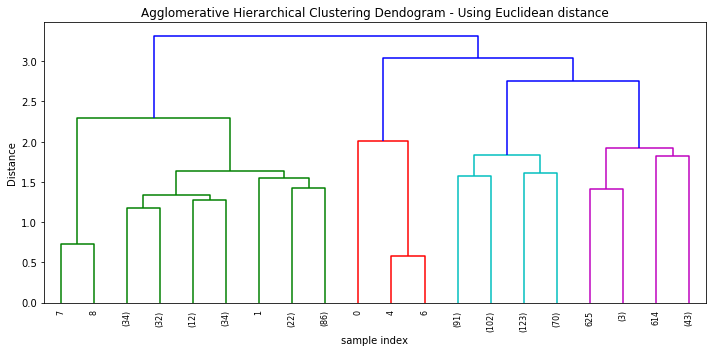

In [30]:
# Ploting the dendogram:
Z = linkage(df4, metric='euclidean', method='average')
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Using Euclidean distance')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,p=4,color_threshold = 2.5, leaf_font_size=8., truncate_mode= 'level' )  # color=2.5 to color 4 groups
plt.tight_layout()

In [31]:
# From the Dendogram we see we could use 4 Groups, but one of those groups will be very small, 
# So, is better to only use 3 groups
# same happened with 'cityblock' or 'chebyshev' merics.
# Hence, we are going to use Euclidian but also try Cosine distance (to see if we can increase the number of clusters)

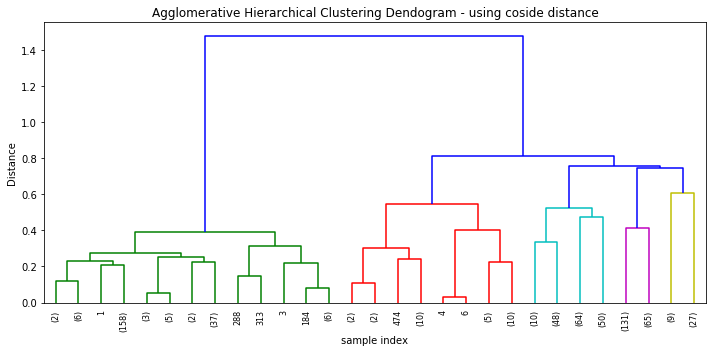

In [32]:
# Ploting the dendogram for cosine distance:
Z = linkage(df4, metric='cosine', method='average')  # changing to 'average' linkage as  median is not supported for cosine
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - using coside distance')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,p=4,color_threshold = .7, leaf_font_size=8., truncate_mode= 'level' ) 
plt.tight_layout()

In [33]:
# Using 'Cosine' distance we see 4 or 5 bigger (usable) groups than for 'euclidean'

In [34]:
# Herarquical Clustering:
df5=df2.copy(deep=True)
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.cluster import AgglomerativeClustering

# Because we  will not use 'ward', we could change the distance, to other afinity than 'euclidean', but I'm going to stick to it
Her_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')  
Her_model.fit(df5)

df5['Group'] = Her_model.labels_
labels = Her_model.labels_
counts2 = np.bincount(labels[labels>=0]) # to obtain the number of elements in each group
df6 = df5.groupby(['Group'])
df6.mean()       #displaying the means to see numerically  where each group  has higher representation in each variable

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,-0.60,-1.06,-0.90,0.31,1.15
1,0.03,1.92,-1.09,-0.06,-0.89
2,1.74,-0.17,-1.27,-0.19,-0.67
3,-0.03,0.38,0.67,-0.55,-0.55


Size of the Groups: [223  48   3 386]


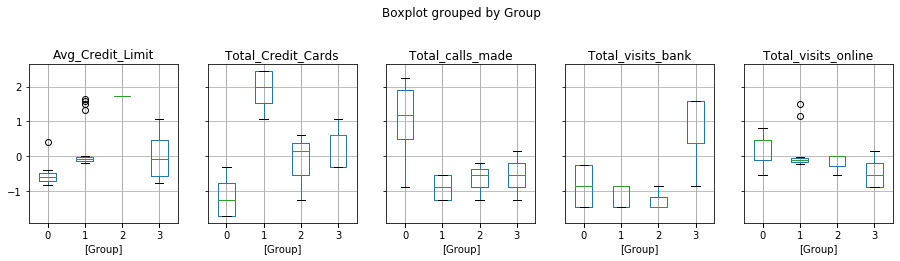

In [35]:
# Boxploting to visualize the groups  (Euclidian):
df5['Group'] = df5['Group'].astype('category')
df5.boxplot(by = 'Group',  layout=(3,5), figsize=(15, 10))
print('Size of the Groups:',counts2)

We see different groups than with KMeans, with more variability or diferentiation.

    - Group 0 - Seem to have fewer credit cards and lowest avg credit limit, same as Group 0 in Kmeans, using the internet more consistently, but characterized for calling the bank more than any other group, probably for frequent internet-customer service issues. also have the lowest avg credit limit (younger people or low spenders or could be disgrunted customers). The bank could offer better online service and leverage the propensy of this group to use the internet, also could ofer them more credit cards.
   
    - Group 1 - Same as group 2 in KMeans: With almost same size (48 vs. 50 samples in KMeans). and seem to have the highest numbers of credit cards, they like to use internet although not consistently, and have outliers in Avg Credit limit. Probable high spenders that the bank wants to retain. The bank has to give them premium service and offer them term deposits.
    
    - Group 2 - Is now the smallest (only 3) and probably very distant from the rest, characterized by highest Avg credit limit and lowest visits to the bank, probably not usable for any campaign purposes.
    
    - Group 3  - Seem to merge groups 1 and 3 from KMeans: Visit the bank more than any other group - they don't want to use the internet as much, averaging in the rest of variables, but second in telephone calls, the bank could offer improved quality of service at the branches.
    
The small size of group 2, reduce this excercise to only 3 groups, probably too few for the Marketing department

In [36]:
# Herarquical Clustering with Cosine distance:

df5=df2.copy(deep=True)
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.cluster import AgglomerativeClustering
Her_model = AgglomerativeClustering(n_clusters=4, affinity='cosine',  linkage='average')  
Her_model.fit(df5)
df5['Group'] = Her_model.labels_
labels = Her_model.labels_
counts2 = np.bincount(labels[labels>=0])
df6 = df5.groupby(['Group'])
df6.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,-0.14,0.21,1.02,-0.52,-0.61
1,0.03,1.11,-0.19,-0.45,-0.61
2,0.73,-0.11,-0.13,-0.60,-0.40
3,-0.59,-1.05,-0.89,0.31,1.16


Size of the Groups: [232 172  32 224]


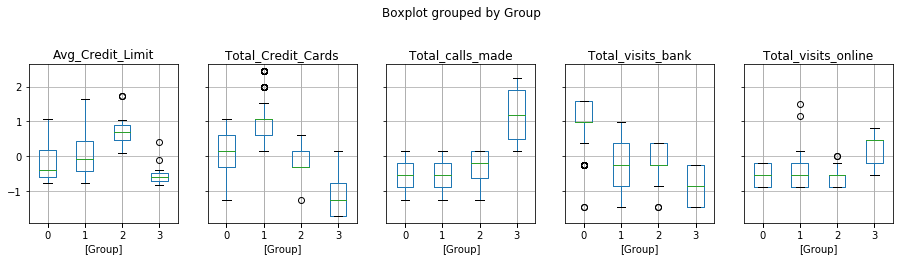

In [37]:
# Boxploting to visualize the groups  (Cosine):
df5['Group'] = df5['Group'].astype('category')
df5.boxplot(by = 'Group',  layout=(3,5), figsize=(15, 10))
print('Size of the Groups:',counts2)

With cosine distance:
Over all, groups sizes are consistent with the KMeans excercise.
Group 0 Is the one that visits the bank the most, but average in any other respect,
Group 1 Has highest number of credit cards is larger, but is no longer the highest in Avg Credit Limit, which is now group 2. Some exceptions of this group have the highest use of internet, similar to the same group in the euclidean excercise.
Group 2 Is the highest in Avg credit limit, but average in other aspects. Suitable for offering financial products,
Group 3 Has the highest number of calls made AND high consistent visits online and could be used for offering more credit cards.

We can identify similar groups as in KMeans, the usability of 4 groups will be acceptable.

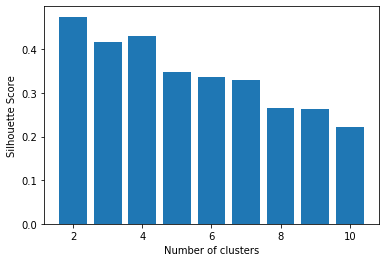

In [38]:
# Calculating Silhouette scores for various numbers of clusters (Euclidean)
silhouette_scores = [] # Creating a result array
for n_cluster in range(2, 11):  # looping  for various numbers of clusters
    silhouette_scores.append(
        silhouette_score(df2, AgglomerativeClustering(linkage='average', affinity='euclidean',n_clusters = n_cluster).fit_predict(df2))) 
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [39]:
# four groups is the best trade-off between having several groups to work in the campaign and a high Silhouette score.

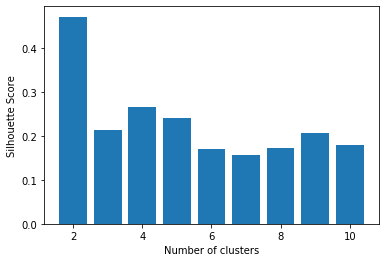

In [40]:
# Calculating Silhouette scores with 'cosine' distance
silhouette_scores = [] # Resetting the Results
for n_cluster in range(2, 11):   # looping  for various numbers of clusters
    silhouette_scores.append(
        silhouette_score(df2, AgglomerativeClustering(linkage='average', affinity='cosine',n_clusters = n_cluster).fit_predict(df2))) 
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

Again, four groups is the best trade-off  using cosine distance, however, in cosine or euclidean the silhouette score is not so great, considering Silhouette is better when closer 1 and worse when closer to -1

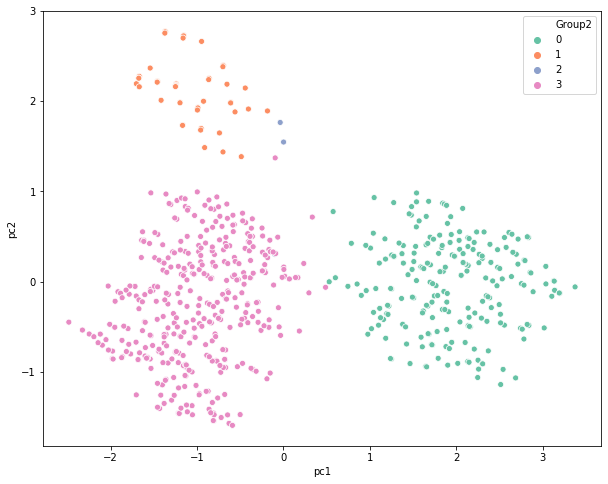

In [53]:
# Using PCA (Principal Component Analysis) to visualize 4 groups
df5=df2.copy(deep=True)
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average') # fitting the model again
model.fit(df5)

from sklearn.decomposition import PCA
pca=PCA(n_components=2) # only first two components are needed for this ploting
principalComponents = pca.fit_transform(df5)   # fitting to obtain principal components
df5 = pd.DataFrame(data = principalComponents  # creating the principal component dummies dataframe
             , columns = ['pc1', 'pc2'])
df5['Group2']=model.labels_   # adding the labels
plt.figure(figsize=(10,8))
sns.scatterplot(x=df5.pc1, y=df5.pc2, hue=df5.Group2, palette="Set2") # plotting the 2 principal components 


Principal components segregate the groups more clearly, we could try them as groups but will be dificult to explain /interpret to the Marketing and Customer Service departments.

### Conclusions





There are multiple ways to perform clustering, but at the end is a matter of multiple tries to select the best distance metric, and a discretionary excercise to select the number of clusters, which in turn could bring a trade-off between sufficiend detail and variation of the groups for workability. in this excercise, the Marketing department of the bank could use four clusters for general campaigns but if they want more focused campaigns both for customer service improvement and for selling financial products, a sub-sample and perhaps incorporating additional features, such as default rate, average account balance, or time at the phone and number of service issues should be added. 

